In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
import pandas as pd
from pandas import get_dummies
import seaborn as sns
from catboost import CatBoostRegressor
#from xgboost import XGBRegressor
%matplotlib inline

In [2]:
df = pd.read_excel("cian_rent12.xlsx")
df.head()

,price,area,floor,year,region,fridge,tv,bath,conditioner,internet,washing_machine,dishwasher,furniture_in_rooms,furniture_in_kitchen
0,330000,95.0,44,NaN,ЦАО,1,1,1,1,1,1,1,1,1
1,220000,53.0,69,NaN,ЦАО,1,1,1,1,1,1,1,1,1
2,175000,60.0,40,2020.0,ЦАО,1,1,1,1,1,1,1,1,1
3,400000,115.0,6,2014.0,ЦАО,1,1,0,0,1,1,1,1,1
4,220000,70.0,64,NaN,ЦАО,1,1,1,1,1,1,1,1,1


In [3]:
reg_dict = {'ЦАО': "CAO", 'ЗАО': "ZAO", 'САО': "SAO", 'ЮЗАО': "YZAO", 'СВАО': "AVAO", 'ЮВАО': "YVAO", 'ЮАО':"YAO", 
            'ВАО': "VAO", 'СЗАО': "SZAO", 'НАО': "NAO", 'ЗелАО': "ZELAO", 'ТАО': "TAO"}

for i in range(df.shape[0]):
    df.loc[i, "region"] = reg_dict[df.loc[i, "region"]]
    
df.head()

,price,area,floor,year,region,fridge,tv,bath,conditioner,internet,washing_machine,dishwasher,furniture_in_rooms,furniture_in_kitchen
0,330000,95.0,44,NaN,CAO,1,1,1,1,1,1,1,1,1
1,220000,53.0,69,NaN,CAO,1,1,1,1,1,1,1,1,1
2,175000,60.0,40,2020.0,CAO,1,1,1,1,1,1,1,1,1
3,400000,115.0,6,2014.0,CAO,1,1,0,0,1,1,1,1,1
4,220000,70.0,64,NaN,CAO,1,1,1,1,1,1,1,1,1


In [4]:
df.isna().sum()

price                     0
area                      0
floor                     0
year                    446
region                    0
fridge                    0
tv                        0
bath                      0
conditioner               0
internet                  0
washing_machine           0
dishwasher                0
furniture_in_rooms        0
furniture_in_kitchen      0
dtype: int64

In [5]:
df_clear = df.dropna()

In [6]:
df_clear.isna().sum()

price                   0
area                    0
floor                   0
year                    0
region                  0
fridge                  0
tv                      0
bath                    0
conditioner             0
internet                0
washing_machine         0
dishwasher              0
furniture_in_rooms      0
furniture_in_kitchen    0
dtype: int64

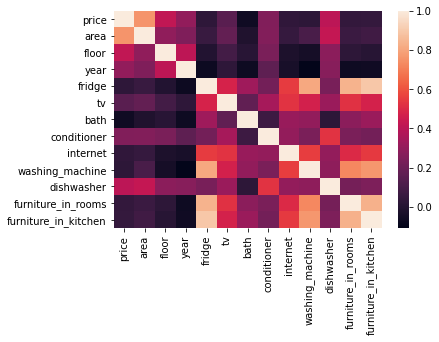

In [7]:
sns.heatmap(df_clear.drop("region", axis=1).corr())
None

In [8]:
df_clear.drop("region", axis=1).corr()

,price,area,floor,year,fridge,tv,bath,conditioner,internet,washing_machine,dishwasher,furniture_in_rooms,furniture_in_kitchen
price,1.000000,0.756609,0.418187,0.295517,0.029565,0.150788,-0.063372,0.253774,0.031551,0.024404,0.403775,0.041938,0.047108
area,0.756609,1.000000,0.291471,0.250837,0.060167,0.174547,-0.013939,0.256634,0.051101,0.105884,0.425036,0.063375,0.081781
floor,0.418187,0.291471,1.000000,0.410130,-0.007047,0.089305,0.010364,0.234611,-0.025685,-0.045687,0.279965,0.022922,0.005526
year,0.295517,0.250837,0.410130,1.000000,-0.073145,0.026246,-0.066691,0.162406,-0.035385,-0.108279,0.269702,-0.066148,-0.062568
fridge,0.029565,0.060167,-0.007047,-0.073145,1.000000,0.477945,0.331267,0.219447,0.548040,0.805641,0.231130,0.838822,0.895775
tv,0.150788,0.174547,0.089305,0.026246,0.477945,1.000000,0.168827,0.347034,0.527676,0.469951,0.317359,0.519480,0.472415
bath,-0.063372,-0.013939,0.010364,-0.066691,0.331267,0.168827,1.000000,0.072196,0.312917,0.296353,0.024467,0.280510,0.318674
conditioner,0.253774,0.256634,0.234611,0.162406,0.219447,0.347034,0.072196,1.000000,0.302359,0.237534,0.525403,0.233734,0.220550
internet,0.031551,0.051101,-0.025685,-0.035385,0.548040,0.527676,0.312917,0.302359,1.000000,0.553262,0.298889,0.501591,0.544281
washing_machine,0.024404,0.105884,-0.045687,-0.108279,0.805641,0.469951,0.296353,0.237534,0.553262,1.000000,0.286909,0.723690,0.762659


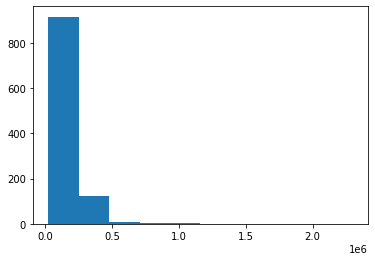

In [9]:
plt.hist(df_clear["price"], bins=10)
None

In [10]:
df_final = get_dummies(df_clear)
df_final.head()

,price,area,floor,year,fridge,tv,bath,conditioner,internet,washing_machine,...,region_NAO,region_SAO,region_SZAO,region_TAO,region_VAO,region_YAO,region_YVAO,region_YZAO,region_ZAO,region_ZELAO
2,175000,60.0,40,2020.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,400000,115.0,6,2014.0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,250000,53.4,60,2019.0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,400000,115.0,6,2015.0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7,240000,53.3,64,2020.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X = df_final.drop("price", axis=1)
y = df_final["price"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [13]:
X_test.shape, y_train.shape

((318, 24), (740,))

In [14]:
learning_rates = [0.05, 0.1, 0.2, 0.5]
epochs = [10, 12, 15, 20]
max_depths = [5, 6, 7, 9, 12]

In [15]:
best_lr = 0.5 #0.5
best_iter = 20 #20
best_max = 9 #9
mse = 10000000

'''for lr in learning_rates:
    for iter_ in epochs:
        for depth in max_depths:
            cat = CatBoostRegressor(learning_rate=lr, iterations=iter_, max_depth=depth)
            cat.fit(X_train, y_train)
            preds = cat.predict(X_test)
            if mean_squared_log_error(preds, y_test) < mse:
                mse = mean_squared_log_error(preds, y_test)
                best_lr = lr
                best_iter = iter_
                best_max = depth
'''

'for lr in learning_rates:\n    for iter_ in epochs:\n        for depth in max_depths:\n            cat = CatBoostRegressor(learning_rate=lr, iterations=iter_, max_depth=depth)\n            cat.fit(X_train, y_train)\n            preds = cat.predict(X_test)\n            if mean_squared_log_error(preds, y_test) < mse:\n                mse = mean_squared_log_error(preds, y_test)\n                best_lr = lr\n                best_iter = iter_\n                best_max = depth\n'

In [16]:
best_lr, best_iter, best_max

(0.5, 20, 9)

In [17]:
cat = CatBoostRegressor(learning_rate=best_lr, iterations=best_iter, max_depth=best_max)
cat.fit(X_train, y_train)
preds = cat.predict(X_test)

0:	learn: 122948.7024855	total: 88.8ms	remaining: 1.69s
1:	learn: 103838.5622362	total: 100ms	remaining: 901ms
2:	learn: 92470.3894032	total: 111ms	remaining: 626ms
3:	learn: 83873.1208074	total: 121ms	remaining: 483ms
4:	learn: 80697.6969182	total: 124ms	remaining: 372ms
5:	learn: 76980.7913417	total: 134ms	remaining: 313ms
6:	learn: 74813.3100337	total: 140ms	remaining: 260ms
7:	learn: 73266.7194522	total: 141ms	remaining: 211ms
8:	learn: 66541.2663860	total: 151ms	remaining: 184ms
9:	learn: 62114.0331086	total: 161ms	remaining: 161ms
10:	learn: 61143.7935489	total: 162ms	remaining: 132ms
11:	learn: 60289.9632052	total: 163ms	remaining: 109ms
12:	learn: 56772.6155133	total: 172ms	remaining: 92.9ms
13:	learn: 54107.8261460	total: 176ms	remaining: 75.2ms
14:	learn: 48382.1355854	total: 184ms	remaining: 61.5ms
15:	learn: 44804.2237202	total: 192ms	remaining: 47.9ms
16:	learn: 42805.0079048	total: 196ms	remaining: 34.5ms
17:	learn: 38219.2780922	total: 203ms	remaining: 22.5ms
18:	learn: 

In [20]:
y_test.iloc[255,], preds[255]

(500000, 238923.6277855773)

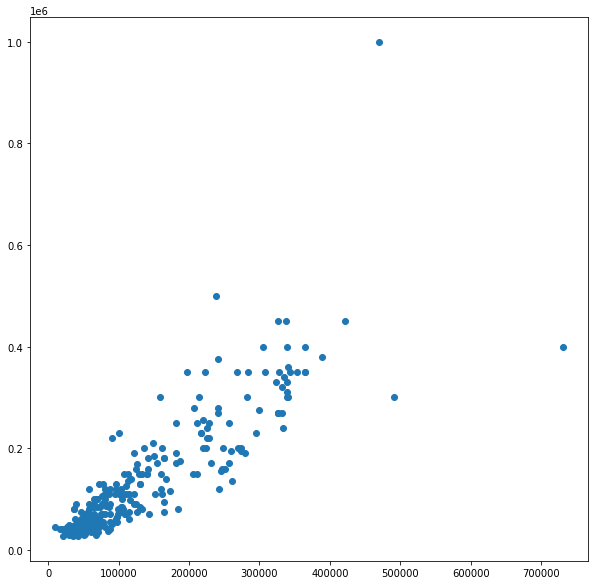

In [21]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(preds, y_test)

In [33]:
gb = df_clear.groupby("region")

In [39]:
gb["price"].mean().sort_values()

region
ZELAO     33000.000000
TAO       40200.000000
VAO       47227.000000
NAO       48273.684211
YVAO      52356.323944
YAO       54875.000000
AVAO      60412.500000
YZAO      60734.543210
SZAO      76646.534483
ZAO       89586.923077
SAO      110310.280374
CAO      242230.173529
Name: price, dtype: float64

In [41]:
X = df_final.drop("area", axis=1)
y = df_final["area"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [42]:
cat_area = CatBoostRegressor(learning_rate=0.5, iterations=20, max_depth=7)

In [43]:
cat_area.fit(X_train, y_train)

0:	learn: 21.9246011	total: 4.31ms	remaining: 81.9ms
1:	learn: 18.5789892	total: 8.49ms	remaining: 76.4ms
2:	learn: 18.0828377	total: 9.34ms	remaining: 52.9ms
3:	learn: 15.9769984	total: 13.3ms	remaining: 53.1ms
4:	learn: 14.8580014	total: 16.9ms	remaining: 50.8ms
5:	learn: 14.3386307	total: 20.4ms	remaining: 47.6ms
6:	learn: 13.9042971	total: 23.5ms	remaining: 43.6ms
7:	learn: 13.7201841	total: 24.5ms	remaining: 36.8ms
8:	learn: 13.3048315	total: 27.9ms	remaining: 34.2ms
9:	learn: 12.9168508	total: 31.2ms	remaining: 31.2ms
10:	learn: 12.4449841	total: 34.7ms	remaining: 28.4ms
11:	learn: 12.3073620	total: 38ms	remaining: 25.4ms
12:	learn: 12.1443837	total: 41.2ms	remaining: 22.2ms
13:	learn: 11.4576799	total: 44.4ms	remaining: 19ms
14:	learn: 11.3311182	total: 47.5ms	remaining: 15.8ms
15:	learn: 11.2647576	total: 48.8ms	remaining: 12.2ms
16:	learn: 10.9770480	total: 51ms	remaining: 8.99ms
17:	learn: 10.5647876	total: 53.3ms	remaining: 5.92ms
18:	learn: 10.3888606	total: 55.3ms	remainin

In [44]:
preds_area = cat_area.predict(X_test)

In [50]:
preds_area[55], y_test.iloc[55,]

(33.836429631783936, 36.0)

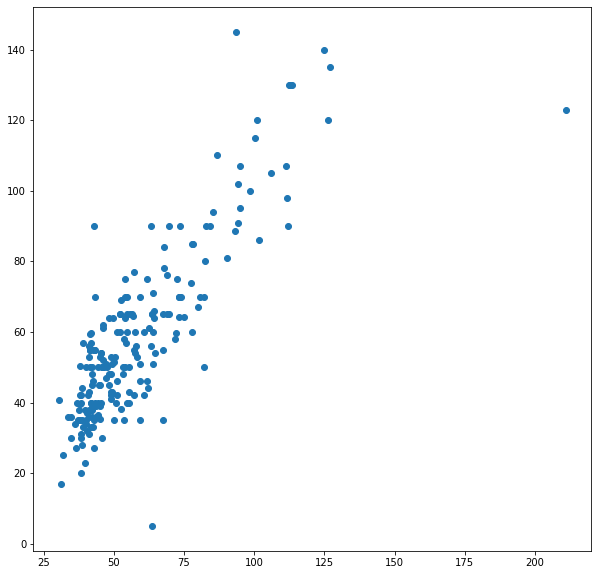

In [51]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(preds_area, y_test)